In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv('../3-Data_Cleaning/movies_half.csv')

In [3]:
data

,电影名,导演,编剧,演员,类型,电影时长(分钟),上映时间(年),评分
0,角斗士 Gladiator,雷德利·斯科特,"大卫·弗兰佐尼,约翰·洛根,威廉姆·尼克尔森","罗素·克劳,华金·菲尼克斯,康妮·尼尔森,奥列佛·里德,理查德·哈里斯,德里克·雅各比,杰曼...",剧情,155,2000,8.5
1,外出就餐3：饕餮自助 Eating Out 3: All You Can Eat,葛伦·盖洛,"菲利普·J·巴特尔,亚伦·布洛卡","利百加·科汉,克里斯·萨尔瓦多,迈克尔E.R.沃克,敏科·斯荳,莱斯利·乔丹,素玛立·蒙塔诺...",喜剧,80,2009,6.6
2,蝴蝶效应2 The Butterfly Effect 2,约翰·R·莱昂耐迪,Michael D. Weiss,"埃里克·里夫利,埃莉卡·杜兰斯,达斯汀·米利甘,吉娜·赫尔顿,林赛·麦克斯维尔",剧情,92,2006,6.1
3,铁血柔情 Love Me Tender,罗伯特·D·韦布,"莫里斯·杰拉蒂,罗伯特·巴克纳","Richard Egan,Debra Paget,Elvis Presley",剧情,89,1956,7.2
4,冰川时代 Ice Age,卡洛斯·沙尔丹哈,"迈克尔·伯格 ,迈克尔·J·威尔森,彼得·阿克曼","雷·罗马诺,约翰·雷吉扎莫,丹尼斯·利瑞,杰克·布莱克",喜剧,81,2002,8.6
5,危情雪夜,陈国星,郝建,"陶泽如,吴越,高明,何冰,马伊琍,张涵予",剧情,84,2004,5.9
6,李尔王 Great Performances: King Lear,特雷弗·纳恩,莎士比亚,"伊恩·麦克莱恩,菲利普·文切斯特,弗兰西斯·巴贝,莫妮卡·杜兰,萝玛拉·嘉瑞,西尔维斯特·迈...",剧情,150,2008,8.3
7,极限特工2 xXx: State of the Union,李·塔玛霍瑞,西蒙·金伯格,"艾斯·库珀,塞缪尔·杰克逊,威廉·达福,斯科特·斯比德曼,彼得·斯特劳斯,桑妮·马布雷,诺娜·加耶",动作,101,2005,6.6
8,大逃杀 バトル・ロワイアル,深作欣二,"深作健太,高见广春","藤原龙也,前田亚季,山本太郎,北野武,栗山千明,高冈奏辅,塚本高史,小谷幸弘,石川绘里,神谷...",剧情,114,2000,8.0
9,蜀山奇侠,萧笙,"林少枝,钟政良,吴玉章,曾广平","杨宝玲,李婉华,李丽丽,龚慈恩,关礼杰",爱情,120,1990,8.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 8 columns):
电影名         6141 non-null object
导演          6141 non-null object
编剧          6141 non-null object
演员          6141 non-null object
类型          6141 non-null object
电影时长(分钟)    6141 non-null int64
上映时间(年)     6141 non-null int64
评分          6141 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 383.9+ KB


In [5]:
# 1.数据分类 

#添加列评分次数
data['评分次数'] = 1

#按电影上映年分类并计算平均评分
grouped = data.groupby(by='上映时间(年)')
datas = grouped.sum()
datas['平均评分'] = (datas['评分']/datas['评分次数']).round(1)

#选择绘图列
MovieYear = list(datas.index)
AverageScore = list(datas['平均评分'])
AverageScore.sort()

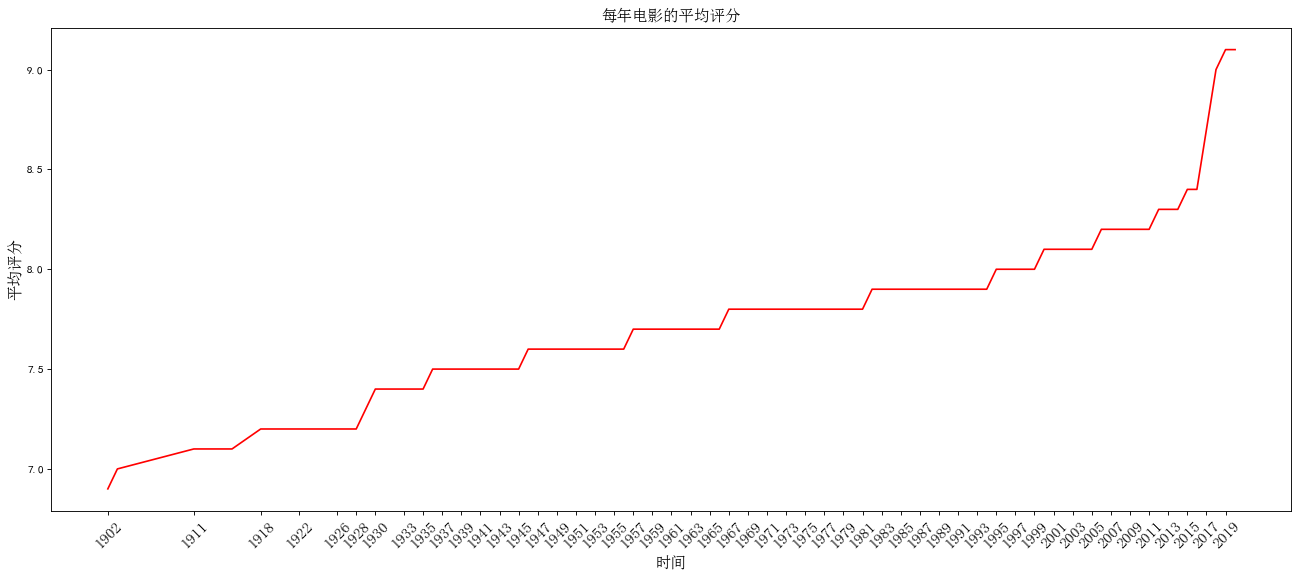

In [6]:
# 2.绘制图片

#设置图片大小
plt.figure(figsize=(20,8),dpi=80)

#设置字体
my_font = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=14)

#绘制图片
plt.plot(MovieYear,AverageScore,color='red')

#设置步长和旋转度数和中文
plt.xticks(MovieYear[::2],MovieYear[::2],rotation=45,fontproperties=my_font)

#添加描述信息
plt.xlabel("时间",fontproperties=my_font)
plt.ylabel("平均评分",fontproperties=my_font)
plt.title("每年电影的平均评分",fontproperties=my_font)

#保存图片
plt.savefig("./每年电影的平均评分.png") #保存为.svg格式矢量图，不会有失帧

#展示图片
plt.show()